In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df.shape

(5110, 12)

### Drop unnecessary columns from dataframe
1. Id
2. Work Type

In [6]:
df = df.dropna()
df = df.drop(['id'], axis=1)
df = df.drop(['work_type'], axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Rural,166.29,25.6,formerly smoked,0


In [7]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

#### Replace yes with 1 and No with 0
#### Replace Urban as 1 and Rural as 0
##### formerly  smoked - 1 ; never smoked - 0;  smokes - 2;  Unknown -3;

In [9]:
df = df.replace("Yes", 1)
df = df.replace("No", 0)
df = df.replace("Urban", 1)
df = df.replace("Rural", 0)
df = df.replace(["Male", "Female", "Other"], [1, 2, 0])
df = df.replace(["formerly smoked","never smoked","smokes","Unknown"], [1,0,2,3])
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,228.69,36.6,1,1
2,1,80.0,0,1,1,0,105.92,32.5,0,1
3,2,49.0,0,0,1,1,171.23,34.4,2,1
4,2,79.0,1,0,1,0,174.12,24.0,0,1
5,1,81.0,0,0,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...
5104,2,13.0,0,0,0,0,103.08,18.6,3,0
5106,2,81.0,0,0,1,1,125.20,40.0,0,0
5107,2,35.0,0,0,1,0,82.99,30.6,0,0
5108,1,51.0,0,0,1,0,166.29,25.6,1,0


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_20/567832216.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 2400x2000 with 0 Axes>

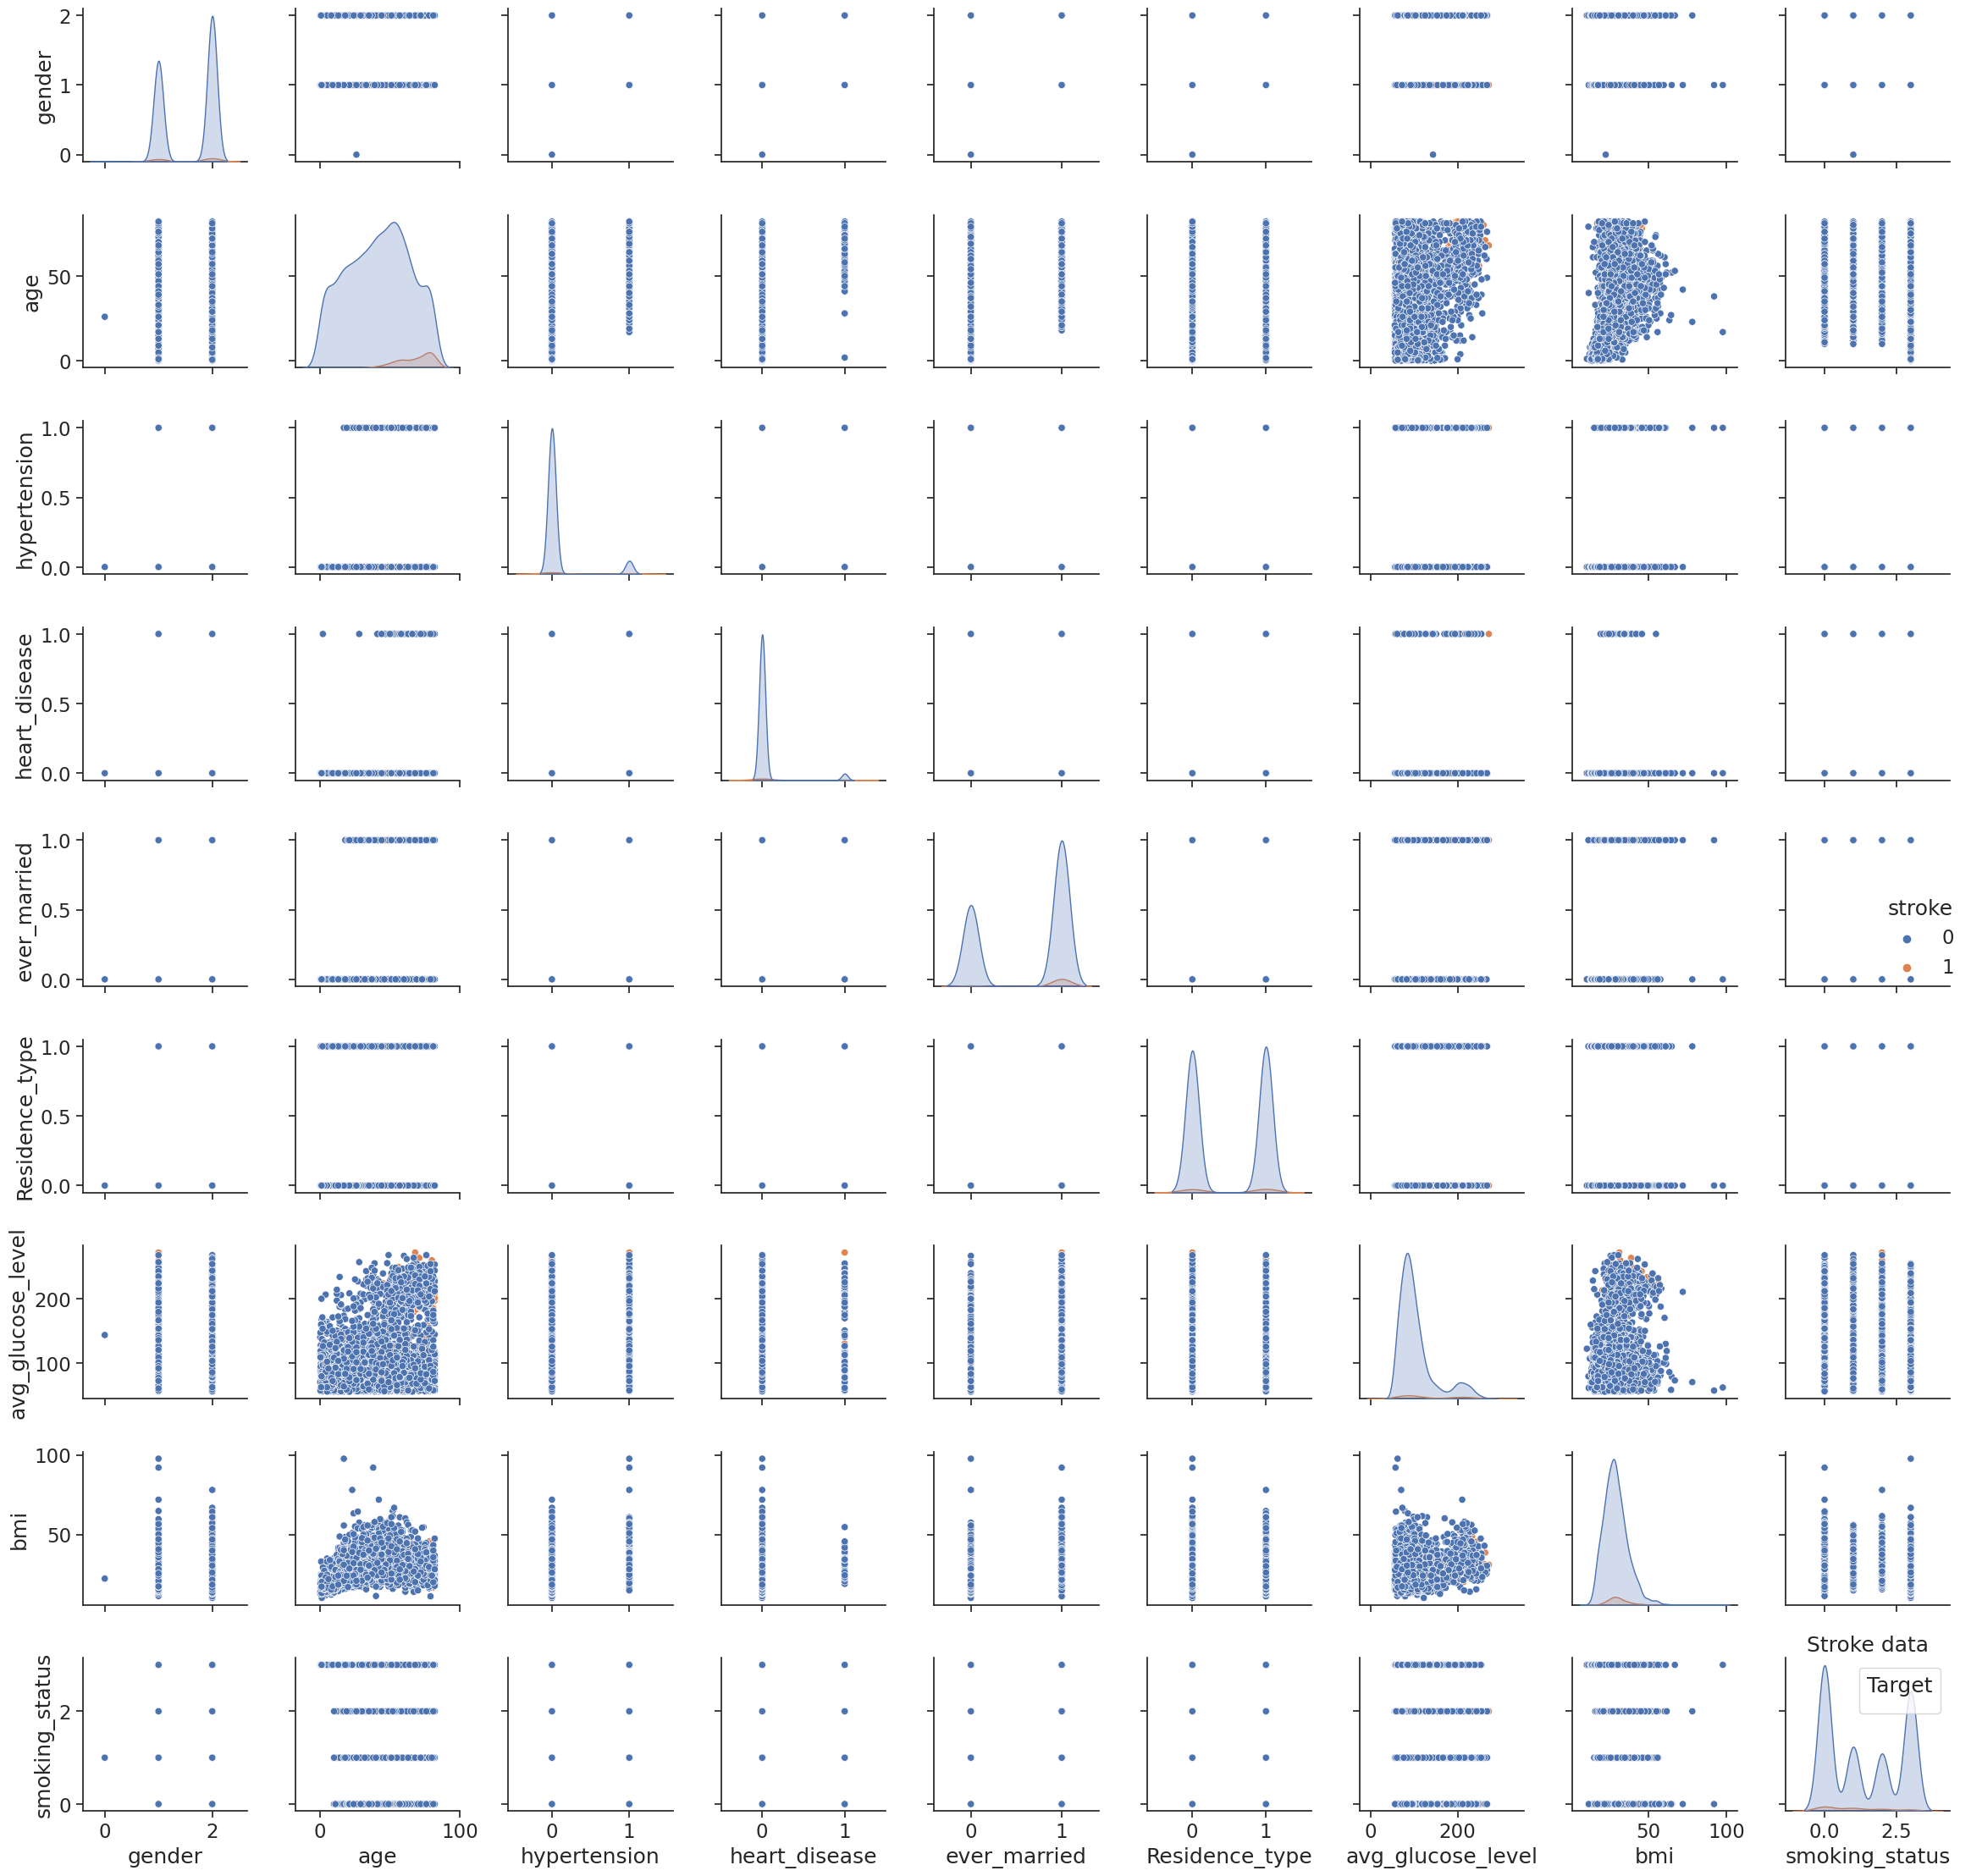

In [10]:
sns.set(style="ticks", font_scale=1.5)
plt.figure(figsize=(24,20))

sns.pairplot(df, hue="stroke")
plt.title("Stroke data")
plt.legend(title="Target", loc="upper right")
plt.tight_layout()
plt.show()

In [11]:
df_res = df.stroke
df_col = df.drop(['stroke'], axis=1)

In [12]:
train_X, test_X, train_y, test_y = train_test_split(df_col, df_res, test_size=0.2, random_state = 0)

#### decision tree

In [13]:
st_x = StandardScaler()
train_X = st_x.fit_transform(train_X)
test_X = st_x.fit_transform(test_X)

In [14]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
classifier.score(train_X, train_y)

1.0

In [16]:
classifier.score(test_X,test_y)

0.9215885947046843

Looks like overfitting problem. We have to solve it so that no overfitting problem will occure